In [27]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [14]:
# 1. Import the sqlalchemy extract function.
# from sqlalchemy import extract - not needed

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_tobs = session.query(Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == "06").all()
june_tobs[:10]

[(78.0),
 (76.0),
 (78.0),
 (76.0),
 (77.0),
 (78.0),
 (77.0),
 (78.0),
 (78.0),
 (79.0)]

In [12]:
#  3. Convert the June temperatures to a list.
june_temp = list(np.ravel(june_tobs))
june_temp[:10]

[78.0, 76.0, 78.0, 76.0, 77.0, 78.0, 77.0, 78.0, 78.0, 79.0]

In [17]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
# import pandas
df_june = pd.DataFrame(june_temp, columns=['June Temp'])
df_june.head()

,June Temp
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0


In [16]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df_june.describe()

,June Temp
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [18]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_tobs = session.query(Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == "12").all()
dec_tobs[:10]

[(76.0),
 (74.0),
 (74.0),
 (64.0),
 (64.0),
 (67.0),
 (77.0),
 (66.0),
 (69.0),
 (68.0)]

In [20]:
# 7. Convert the December temperatures to a list.
dec_temp = list(np.ravel(dec_tobs))
dec_temp[:10]

[76.0, 74.0, 74.0, 64.0, 64.0, 67.0, 77.0, 66.0, 69.0, 68.0]

In [21]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df_dec = pd.DataFrame(dec_temp, columns=['Dec Temp'])
df_dec.head()

,Dec Temp
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0


In [22]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df_dec.describe()

,Dec Temp
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


# Extra

In [23]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Frequency'>

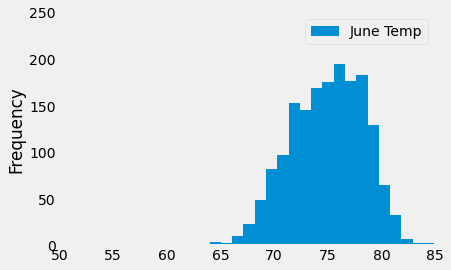

In [59]:
df_june.plot.hist(bins=20, xlim=[50,85], ylim=[0,250], grid=0)

<AxesSubplot:ylabel='Frequency'>

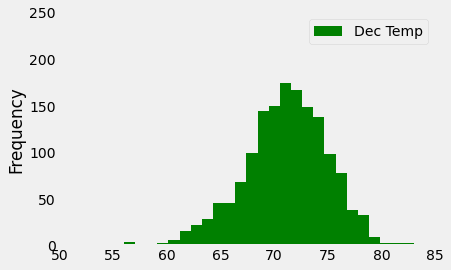

In [25]:
df_dec.plot.hist(bins=26, xlim=[50,85], ylim=[0,250], color='g', grid=0)

In [26]:
# how many cold days?
cold = df_dec[df_dec['Dec Temp'] <= 65].count()
cold

Dec Temp    125
dtype: int64

In [28]:
# check columns
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [29]:
# check the precipitation for June
june_prcp = session.query(Measurement.prcp).\
    filter(func.strftime("%m", Measurement.date) == "06").all()
june_prcp[:10]

[(0.0), (0.01), (0.0), (0.0), (0.0), (0.0), (0.0), (0.0), (0.0), (0.0)]

In [31]:
# Convert the June precipitation to a list.
june_prcp = list(np.ravel(june_prcp))
june_prcp[:10]

[0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [33]:
# Create a DataFrame from the list of precipitation for the month of June. 
df_june_prcp = pd.DataFrame(june_prcp, columns=['June Precipitation'])
df_june_prcp.head()

,June Precipitation
0,0.00
1,0.01
2,0.00
3,0.00
4,0.00


In [30]:
# check the precipitation for December
dec_prcp = session.query(Measurement.prcp).\
    filter(func.strftime("%m", Measurement.date) == "12").all()
dec_prcp[:10]

[(0.04), (0.0), (0.0), (0.0), (0.0), (0.0), (0.0), (1.58), (0.77), (0.0)]

In [32]:
# Convert the December precipitation to a list.
dec_prcp = list(np.ravel(dec_prcp))
dec_prcp[:10]

[0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.58, 0.77, 0.0]

In [34]:
# Create a DataFrame from the list of precipitation for the month of December. 
df_dec_prcp = pd.DataFrame(dec_prcp, columns=['December Precipitation'])
df_dec_prcp.head()

,December Precipitation
0,0.04
1,0.00
2,0.00
3,0.00
4,0.00


In [35]:
# get statistics for June
df_june_prcp.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [36]:
# get statistics for December
df_dec_prcp.describe()

,December Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


<AxesSubplot:ylabel='Frequency'>

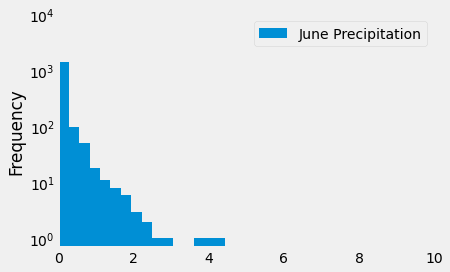

In [131]:
df_june_prcp.plot.hist(bins=16, xlim=[0,10], ylim=[0,10000], grid=0, logy=True)

<AxesSubplot:ylabel='Frequency'>

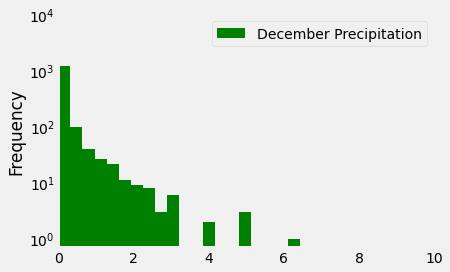

In [132]:
df_dec_prcp.plot.hist(bins=20, color='g', xlim=[0,10], ylim=[0,10000], grid=0, logy=True)